/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


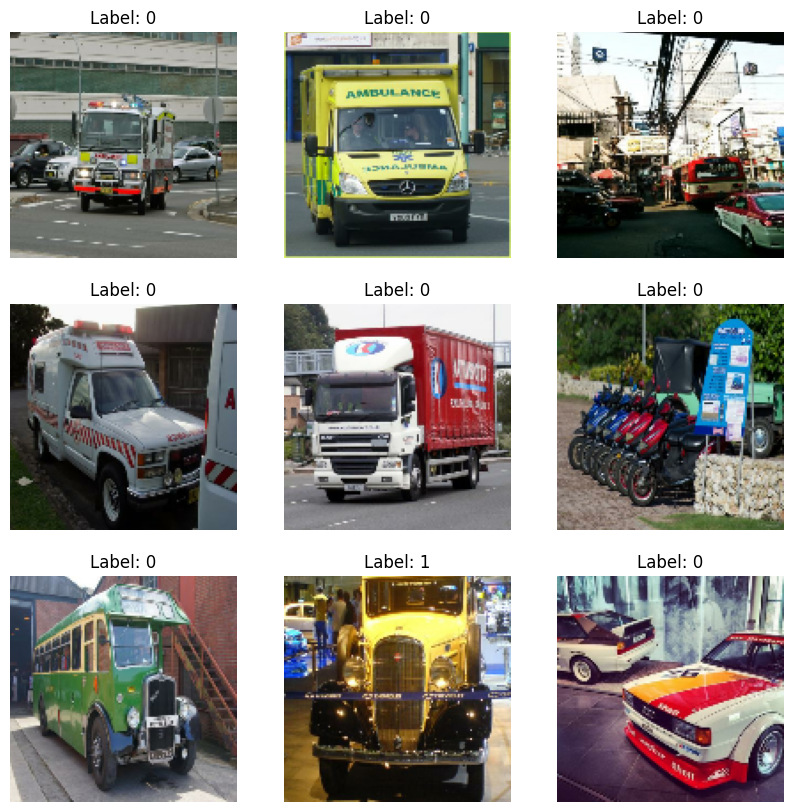

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# DATA PATH
train_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/train/images"
train_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/train/labels"

test_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images"
test_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/labels"
test_video_dir = r"/kaggle/input/vehicledetection/TestVideo/TrafficPolice.mp4"

valid_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/images"
valid_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/labels"

# FUNCTION TO PREPROCESS IMAGE
def preprocess_image(image, target_size=(128, 128)):
    image = tf.image.resize(image, target_size)
    image = tf.cast(image, tf.float32) / 255.0  
    return image

# FUNCTION TO PREPROCESS IMAGE FROM DIRECTORY
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [tf.io.read_file(image_path) for image_path in image_paths]
    images = [tf.image.decode_jpeg(image, channels=3) for image in images]
    images = [preprocess_image(image) for image in images]
    return images

# LOAD AND PREPROCESS TRAINING IMAGE
train_images = load_and_preprocess_images(train_image_dir)
train_labels = np.zeros(len(train_images))  # LABEL 0 FOR TRAIN

# LOAD AND PREPROCESS TESTING IMAGE
test_images = load_and_preprocess_images(test_image_dir)
test_labels = np.ones(len(test_images))  # LABEL 1 FOR TEST

# LOAD AND PREPROCESS VALIDATION IMAGE
valid_images = load_and_preprocess_images(valid_image_dir)
valid_labels = np.ones(len(valid_images))  # LABEL 2 FOR VALIDATION

# COMBINE ALL IMAGE AND LABEL
images = np.concatenate([train_images, test_images, valid_images])
labels = np.concatenate([train_labels, test_labels, valid_labels])

# CONVERT LABEL TO ONE HOT ENCODING
encoder = OneHotEncoder(sparse=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# SUFFLE IMAGE AND LABEL
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# VISUALIZE IMAGE
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title("Label: {}".format(np.argmax(labels[i])))
    plt.axis('off')
plt.show()


In [10]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# DATA PATH
train_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/train/images"
train_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/train/labels"

test_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images"
test_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/labels"
test_video_dir = r"/kaggle/input/vehicledetection/TestVideo/TrafficPolice.mp4"

valid_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/images"
valid_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/labels"

# FUNCTION TO PREPROCESS IMAGE
def preprocess_image(image, target_size=(128, 128)):
    image = tf.image.resize(image, target_size)
    image = tf.cast(image, tf.float32) / 255.0  # NORMALIZE TO [0,1]
    return image

# FUNCTION TO PREPROCESS IMAGE FROM DIRECTORY
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [tf.io.read_file(image_path) for image_path in image_paths]
    images = [tf.image.decode_jpeg(image, channels=3) for image in images]
    images = [preprocess_image(image) for image in images]
    return images

# LOAD AND PREPROCESS TRAIN IMAGE 
train_images = load_and_preprocess_images(train_image_dir)
train_labels = np.zeros(len(train_images))  # LABEL 0 FOR TRAIN

# LOAD AND PREPROCESS TEST IMAGE 
test_images = load_and_preprocess_images(test_image_dir)
test_labels = np.ones(len(test_images))  # LABEL 1 FOR TEST

#LOAD AND PREPROCESS VALIDATION IMAGE 
valid_images = load_and_preprocess_images(valid_image_dir)
valid_labels = np.full(len(valid_images), 2)  # LABEL 2 FOR VALIDATION

# COMBINE ALL IMAGE AND LABEL
images = np.concatenate([train_images, test_images, valid_images])
labels = np.concatenate([train_labels, test_labels, valid_labels])

# CONVERT LABEL TOONE HOT ENCODING 
encoder = OneHotEncoder(sparse=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# SUFFLE IMAGE AND LABEL
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# SPLIT DATA INTO TRAINING AND TESTING SET
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# FURTHER SPLIT TRAIN_LABELS INTO TRAIN_LABELS AND VALID LABELS
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

#CHECK SHAPE
print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of valid_images:", valid_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_labels:", test_labels.shape)
print("Shape of valid_labels:", valid_labels.shape)








/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Shape of train_images: (802, 128, 128, 3)
Shape of test_images: (251, 128, 128, 3)
Shape of valid_images: (201, 128, 128, 3)
Shape of train_labels: (802, 3)
Shape of test_labels: (251, 3)
Shape of valid_labels: (201, 3)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


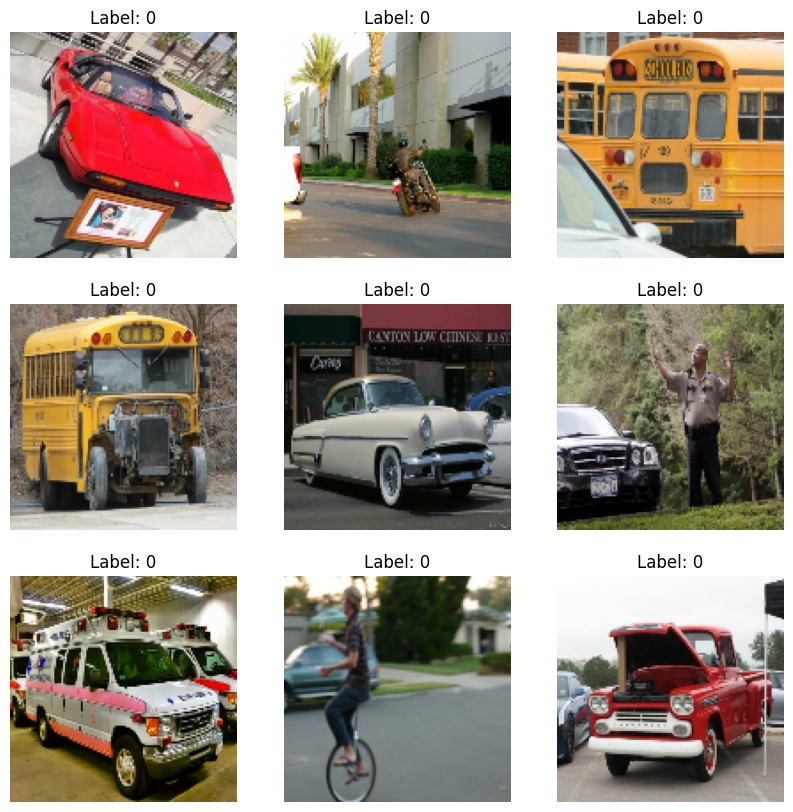

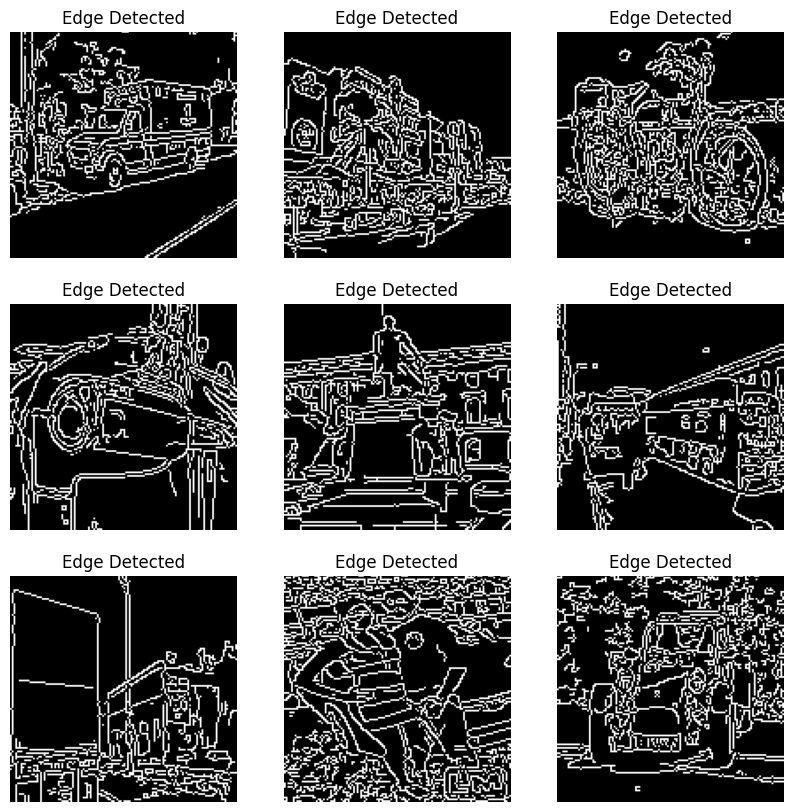

Number of train images: 878
Number of test images: 126
Number of validation images: 250
Shape of train_images[0]: (128, 128, 3)
Shape of test_images[0]: (128, 128, 3)
Shape of valid_images[0]: (128, 128, 3)
Shape of train_labels: (1003, 3)
Shape of test_labels: (251, 3)
Shape of valid_labels: (250,)


In [9]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import cv2
from sklearn.model_selection import train_test_split

# DATA PATH
train_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/train/images"
train_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/train/labels"

test_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images"
test_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/labels"
test_video_dir = r"/kaggle/input/vehicledetection/TestVideo/TrafficPolice.mp4"

valid_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/images"
valid_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/labels"

# FUNCTION TO PREPROCESS IMAGE
def preprocess_image(image, target_size=(128, 128)):
    image = tf.image.resize(image, target_size)
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image



#FUNCTION TO PERFORM EDGE DETECTION ON IMAGE 
def detect_edges(images):
    edges = [cv2.Canny(np.uint8(image * 255), 100, 200) for image in images] #PERFORM CAANY EDGE DETECTION
    return edges

# PERFORM EDGE DETECTION
edge_images = detect_edges(images)

# FUNTION LOAD AND PREPROCESS IMAGES FROM DIR 
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [tf.io.read_file(image_path) for image_path in image_paths]
    images = [tf.image.decode_jpeg(image, channels=3) for image in images]
    images = [preprocess_image(image) for image in images]
    return images

# LOAD AND PREPROCRSS TRAIN IMAGE 
train_images = load_and_preprocess_images(train_image_dir)
train_labels = np.zeros(len(train_images))  # LABEL 0 FOR TRAIN

# LOAD AND PREPROCESS TEST IMAGE 
test_images = load_and_preprocess_images(test_image_dir)
test_labels = np.ones(len(test_images))  # LABEL 1 FOR TEST

# LOAD AND PREPROCESS VALIDATION IMAGE 
valid_images = load_and_preprocess_images(valid_image_dir)
valid_labels = np.full(len(valid_images), 2)  # LABEL 2 FOR VALIDATION

#COMBINE ALL IMAGES AND LABEL
images = np.concatenate([train_images, test_images, valid_images])
labels = np.concatenate([train_labels, test_labels, valid_labels])

# CONVERT LABEL TO ONE HOT ENCODING 
encoder = OneHotEncoder(sparse=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# SHUFFLE IMAGES AND LABEL
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]



# SPLIT DATA INTO TRAIN AND TEST SET
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


# VISUALIZE 
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title("Label: {}".format(np.argmax(labels[i])))
    plt.axis('off')
plt.show()




# VISUALIZE FEW EDGE DETECTED IMAGES 
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(edge_images[i], cmap='gray')
    plt.title("Edge Detected")
    plt.axis('off')
plt.show()


#LOAD AND PREPROCESS TRAIN IMAGE
train_images = load_and_preprocess_images(train_image_dir)
print("Number of train images:", len(train_images))

# LOAD AND PREPROCESS TEST IMAGE 
test_images = load_and_preprocess_images(test_image_dir)
print("Number of test images:", len(test_images))

# LOAD AND PREPROCESS VALIDATION IAMGE 
valid_images = load_and_preprocess_images(valid_image_dir)
print("Number of validation images:", len(valid_images))

# CHECK SHAPE OF IMAGE AND LABEL 
print("Shape of train_images[0]:", train_images[0].shape)
print("Shape of test_images[0]:", test_images[0].shape)
print("Shape of valid_images[0]:", valid_images[0].shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_labels:", test_labels.shape)
print("Shape of valid_labels:", valid_labels.shape)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 629ms/step - accuracy: 0.6347 - loss: 1.0378 - val_accuracy: 0.7015 - val_loss: 0.8669
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 619ms/step - accuracy: 0.6965 - loss: 0.8415 - val_accuracy: 0.7015 - val_loss: 0.7894
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 609ms/step - accuracy: 0.6814 - loss: 0.8211 - val_accuracy: 0.6965 - val_loss: 0.7998
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 612ms/step - accuracy: 0.7007 - loss: 0.7494 - val_accuracy: 0.7065 - val_loss: 0.7728
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 615ms/step - accuracy: 0.7332 - loss: 0.6395 - val_accuracy: 0.7164 - val_loss: 0.7369
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 598ms/step - accuracy: 0.7691 - loss: 0.5378 - val_accuracy: 0.7264 - val_loss: 0.7376
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 629ms/step - accuracy: 0.8752 - loss: 0.3426 - val_accuracy: 0.7811 - val_loss: 0.6045
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 607ms/step - accuracy: 0.9320 - loss: 0.2132 - val_accu

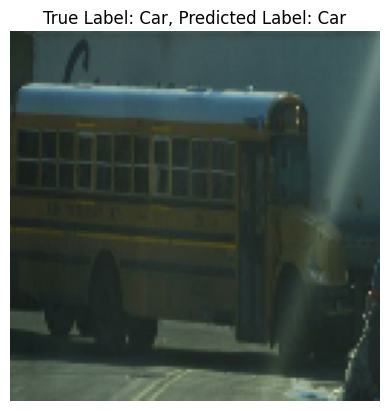

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


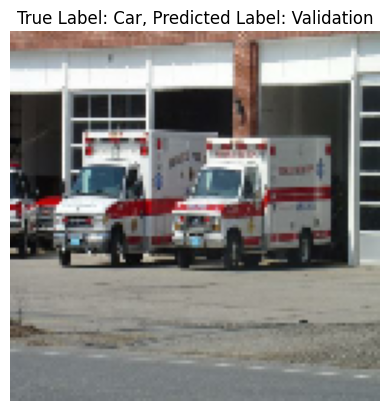

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


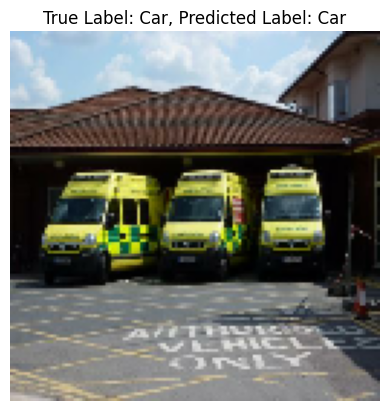

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


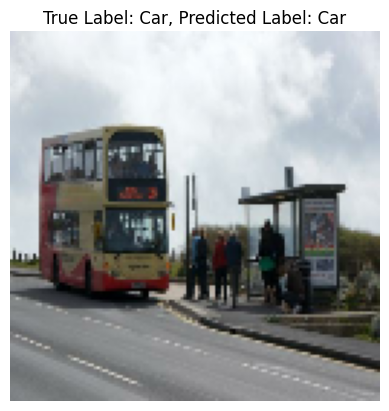

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


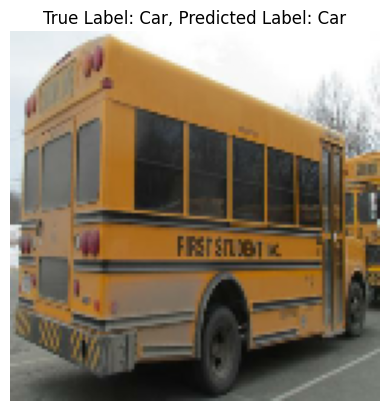

In [12]:
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

# DATA PATH
train_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/train/images"
train_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/train/labels"

test_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images"
test_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/labels"

valid_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/images"
valid_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/labels"

# FUNCTION TO LOAD AND PREPROCESS IMAGE 
def preprocess_image(image, target_size=(128, 128)):
    image = tf.image.resize(image, target_size)
    image = tf.cast(image, tf.float32) / 255.0  
    return image

# # FUNTION LOAD AND PREPROCESS IMAGES FROM DIR 
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [tf.io.read_file(image_path) for image_path in image_paths]
    images = [tf.image.decode_jpeg(image, channels=3) for image in images]
    images = [preprocess_image(image) for image in images]
    return images

# LOAD AND PREPROCRSS TRAIN IMAGE 
train_images = load_and_preprocess_images(train_image_dir)
train_labels = np.zeros(len(train_images))  #LABEL 0 FOR TRAIN

# LOAD AND PREPROCESS TEST IMAGE 
test_images = load_and_preprocess_images(test_image_dir)
test_labels = np.ones(len(test_images))  # LABEL 1 FOR TEST

# LOAD AND PREPROCESS VALIDATION IMAGE 
valid_images = load_and_preprocess_images(valid_image_dir)
valid_labels = np.full(len(valid_images), 2)  # LABEL 2 FOR VALIDATION

#COMBINE ALL IMAGES AND LABEL
images = np.concatenate([train_images, test_images, valid_images])
labels = np.concatenate([train_labels, test_labels, valid_labels])

# CONVERT LABEL TO ONE HOT ENCODING 
encoder = OneHotEncoder(sparse=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# SHUFFLE IMAGES AND LABEL
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]



# SPLIT DATA INTO TRAIN AND TEST SET
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

#FURTHER SPLIT TRAIN DATA INTO TRAIN AND VALIDATION SETS 
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

#BUILD CNN MODEL
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  #OUPUT LAYER 3 CLASSES

# COMPILE THE MODEL
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# TRAIN THE MODEL
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(valid_images, valid_labels))

# EVALUATE THE MODEL
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# FUNCTION TO DETECT AND SHOW CLASS LABEL FOR AN IPUT IMAGE 
def detect_and_print_class(image, label):
    class_labels = {0: 'Car', 1: 'Non-Car', 2: 'Validation'}
    prediction = model.predict(np.expand_dims(image, axis=0))  # MAKE PREDICTION
    predicted_class = np.argmax(prediction[0])  # GET THE INDEX OF THE CLASS WITH HIGHEST PROBABILITY
    predicted_label = class_labels[predicted_class]
    
    plt.imshow(image)
    plt.title(f"True Label: {class_labels[np.argmax(label)]}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

# VISUALIZE
num_images_to_visualize = 5
for i in range(num_images_to_visualize):
    detect_and_print_class(test_images[i], test_labels[i])



In [4]:
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

# DATA PATH
train_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/train/images"
train_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/train/labels"

test_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images"
test_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/labels"

valid_image_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/images"
valid_label_dir = r"/kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/labels"

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def preprocess_image(image, target_size=(128, 128)):
    image = tf.image.resize(image, target_size)
    image = tf.cast(image, tf.float32) / 255.0  
    return image

# FUNCTION TO LOAD AND PREPROCESS IMAGE DIR
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [tf.io.read_file(image_path) for image_path in image_paths]
    images = [tf.image.decode_jpeg(image, channels=3) for image in images]
    images = [preprocess_image(image) for image in images]
    return images

# LOAD AND PREPROCESS TRAIN IMAGE 
train_images = load_and_preprocess_images(train_image_dir)
train_labels = np.zeros(len(train_images))  # LABEL 0 FOR TRAIN

# LOAD AND PREPROCESS TEST IMAGE 
test_images = load_and_preprocess_images(test_image_dir)
test_labels = np.ones(len(test_images))  # LABEL 1 FOR TEST

# LOAD AND PREPROCESS VALIDATION IMAGE 
valid_images = load_and_preprocess_images(valid_image_dir)
valid_labels = np.full(len(valid_images), 2)  # LABEL 2 FOR VALIDATION

# COMBINE ALL IMAGE ANS LABEL
images = np.concatenate([train_images, test_images, valid_images])
labels = np.concatenate([train_labels, test_labels, valid_labels])

# CONVERT LABEL TO ONE HOT ENCDOING  
encoder = OneHotEncoder(sparse=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# SHUFFLE IMAGES AND LABEL
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# SPLIT DATA INTO TRAIN AND TEST SET 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# #FURTHER SPLIT TRAIN DATA INTO TRAIN AND VALIDATION SETS 
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

#BUILD THE CNN MODEL 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # OUTPUT LAYER 3 CLASSES

# COMPILE THE MODEL 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# TRAIN THE MODEL 
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(valid_images, valid_labels))

# EVALUATE THE MODEL 
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# DEFINE PATH 
model_path = "/path/to/save/model.h5"

# Save the model
model.save(model_path)
print("Model saved successfully at:", model_path)

# LOAD AND SAVE MODEL 
loaded_model = tf.keras.models.load_model(model_path)

# EVALUATE THE LOAD MODEL 
loaded_model_loss, loaded_model_accuracy = loaded_model.evaluate(test_images, test_labels)
print('Loaded model test accuracy:', loaded_model_accuracy)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 665ms/step - accuracy: 0.5591 - loss: 1.3731 - val_accuracy: 0.7264 - val_loss: 0.7872
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 622ms/step - accuracy: 0.6961 - loss: 0.8168 - val_accuracy: 0.7264 - val_loss: 0.7619
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 648ms/step - accuracy: 0.6804 - loss: 0.8075 - val_accuracy: 0.7264 - val_loss: 0.8514
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 634ms/step - accuracy: 0.6933 - loss: 0.8158 - val_accuracy: 0.7264 - val_loss: 0.7176
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 627ms/step - accuracy: 0.7483 - loss: 0.6169 - val_accuracy: 0.6716 - val_loss: 0.7336
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 643ms/step - accuracy: 0.8406 - loss: 0.4327 - val_accuracy: 0.7612 - val_loss: 0.5545
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 635ms/step - accuracy: 0.8920 - loss: 0.3075 - val_accuracy: 0.8010 - val_loss: 0.4820
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 651ms/step - accuracy: 0.9521 - loss: 0.1809 - val_accu

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_v2_preprocess_input

# LOAD PRE-TRAINED MODEL 
model = load_model('/path/to/save/model.h5')

# VIDEO PATH 
video_path = '/kaggle/input/vehicledetection/TestVideo/TrafficPolice.mp4'
cap = cv2.VideoCapture(video_path)

# DEFINE CLASS LABEL
class_labels = ["car", "truck", "bus", "motorbike", "bicycle"]

#FUNCTION TO PREPROCESS THE FRAME FOR THE MobileNetV2 model
def preprocess_frame(frame):
    resized_frame = cv2.resize(frame, (128, 128))
    preprocessed_frame = mobilenet_v2_preprocess_input(resized_frame)
    return preprocessed_frame

# INITIALIZE FRAME COUNTER
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # PREPROCESS THE FRAME 
    preprocessed_frame = preprocess_frame(frame)
    
    # MAKE PREDICTION
    predictions = model.predict(np.expand_dims(preprocessed_frame, axis=0))
    pred_label = class_labels[np.argmax(predictions)]
    
    # DRAW A BOUNDING BOX AROUND THE DETECTED VEHICLES
    if pred_label in ["car", "truck", "bus"]:
        cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), (0, 255, 0), 2)
        cv2.putText(frame, pred_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # SAVE THE FRAME AS AN IMAGE 
    cv2.imwrite(f'frame_{frame_count}.jpg', frame)
    frame_count += 1

# FRONT THE VIDEO CAPTURE 
cap.release()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━